In [1]:
# Authors: Samantha Tetef and Vikram Kashyap
# Date: Winter 2020-2021 to Summer 2021

In [2]:
import warnings
warnings.filterwarnings("ignore")

import utils
from utils import *
from importlib import reload
# to reload utils, run:
utils = reload(utils)
from utils import *


import os
import copy
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.colors import to_hex
from matplotlib.colors import ListedColormap
import mplcursors

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy

from itertools import compress

from pathlib import Path

import webbrowser

warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\saman\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\saman\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [4]:
ROOTDIR = Path()

CIDdir = ROOTDIR/"ProcessedData"
Listdir = ROOTDIR/"Categories"

X_data = get_Data(Listdir)

In [5]:
X_data_classed = [c for c in X_data if c['Class']!='None']

CIDs = np.array([c['CID'] for c in X_data])
NoneCIDs = np.array([c['CID'] for c in X_data if c['Class']=='None'])

compoundmap = {compound['CID']:compound for compound in X_data}

typecodemap = {compound['CID']:compound['Type'] for compound in X_data}
classcodemap = {compound['CID']:CLASSCODES[compound['Class']] for compound in X_data}

classnames = list(CLASSCODES.keys())[:-1]
typecodes = np.unique(list(TYPECODES.values()))[:-1]

XANES_energies = X_data[0]['XANES_Spectra'][0]
XES_energies = X_data[0]['XES_Spectra'][0]

In [6]:
good, bad = 0, 0
diff = []
for compound in X_data:
    x, y = compound['XANES_Transitions']
    whiteline_E = x[np.argmax(y[:-5])]
    max_E = whiteline_E + 14
    num_above_threshold = np.sum(x > max_E)
    
    last_trans = x[0]
    diff.append(max_E - last_trans)
    
    if num_above_threshold > 0:
        good += 1
    else:
        bad += 1
diff = np.array(diff)
print(f'{good} good vs {bad} bad')
print(np.average(diff), ' +/- ', np.std(diff))

284 good vs 821 bad
1.6492027149321202  +/-  7.199094569927656


In [7]:
len(X_data_classed)

1066

# Visualization of Classification Distributions

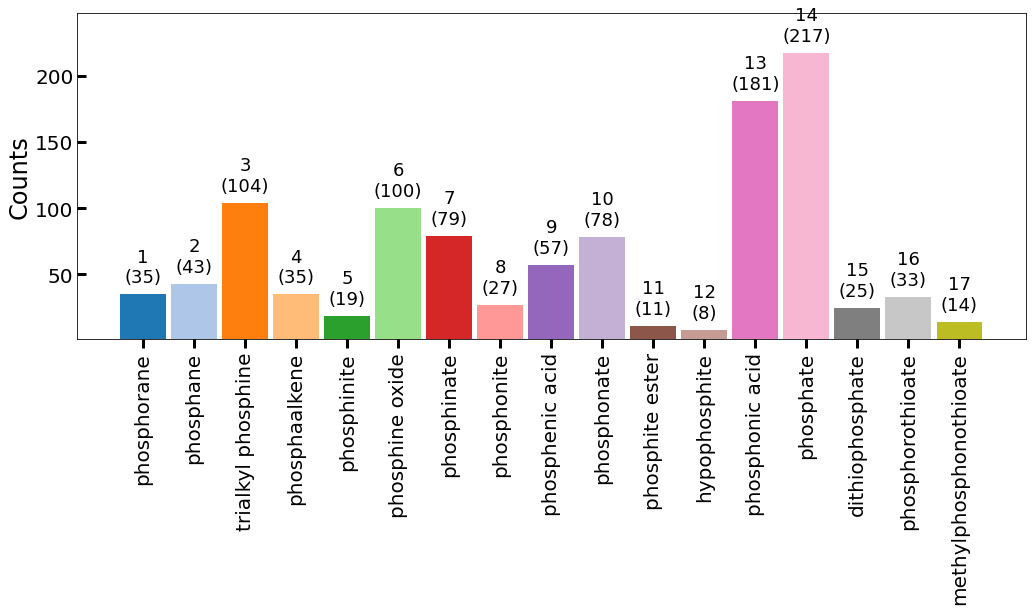

In [8]:
bins = [len([c for c in X_data if c['Class']==classname]) for classname in classnames]
hist(bins, [c.replace('_', ' ') for c in classnames], verbose=True)

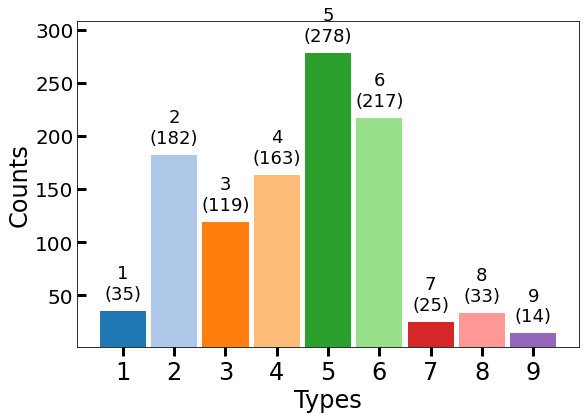

In [9]:
bins = [len([c for c in X_data if c['Type']==typecode]) for typecode in typecodes]
hist(bins, typecodes, verbose=True, xlabel='Types')

### Check calulcations

In [10]:
# checkcids = [11776, 13097, 8289]

# for cid in checkcids:    
#     c = compoundmap[cid]
#     trans = c['XANES_Transitions']
#     trans = esnip(trans, c['XANES_Normalized'], energy=XANES_energies, mode='xanes')
#     plot_spectrum_and_trans([XANES_energies, c['XANES_Normalized']], trans, f'{cid}', label='XANES')

# Theory and Experiment Comparison

In [11]:
# df1 = pd.read_csv('Ph3P.csv')
# df2 = pd.read_csv('Ph3PO.csv')
# df3 = pd.read_csv('PhO3PO.csv')

# hc = 1.23984193e-6 #ev/m
# d = 6.5327e-10 #m
# def to_energy(two_theta):
#     return hc/(d*np.sin(two_theta*(np.pi/180)/2))


# def stack_plot(Spectrums, Labels, title=None,
#                verbose=True, label=None, peaknorm=True):
    
#     n = len(Spectrums)
#     Colors=plt.cm.viridis(np.arange(n)/(n+1))
#     if n == 2:
#         Colors=['black', 'red']
#     fig, ax = plt.subplots(figsize=(10,8))

#     i = 0
#     for spectrum in Spectrums:
#         x, y = spectrum
#         if peaknorm:
#             y = y/np.max(y)
#         ax.plot(x, y, '-', color=Colors[i], linewidth=2, label=Labels[i])
#         i += 1

#     if title is not None:
#         plt.title(title, fontsize=20)
#     plt.xlabel('Energy (eV)', fontsize=18)
#     plt.tick_params(labelsize=16)

#     if verbose:
#         ax.xaxis.set_major_locator(MultipleLocator(5))
#         ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#         ax.xaxis.set_minor_locator(MultipleLocator(1))
#         ax.tick_params(direction='in', width=1, length=5, which='minor')

#     ax.tick_params(direction='in', width=2, length=8, which='major')

#     plt.legend(fontsize=20)
    
#     plt.show()

    
# ####################### spectrum 1
# cid = checkcids[0]
# x = to_energy(df1['2theta'].values)
# y = df1['I'].values
# y = y - np.min(y)
# y = y/np.max(y)
# emin, emax = 350, 800
# x2 = XES_energies[emin:emax]
# c = compoundmap[cid]
# y2 = c['XES_Normalized'][emin:emax]
# e_shift = x2[np.argmax(y2)] - x[np.argmax(y)]
# stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$Ph_3P$")

# ####################### spectrum 2
# cid = checkcids[2]
# x = to_energy(df3['2theta'].values)
# y = df3['I'].values
# y = y - np.min(y)
# y = y/np.max(y)
# emin, emax = 410, 750
# x2 = XES_energies[emin:emax]
# c = compoundmap[cid]
# y2 = c['XES_Normalized'][emin:emax]
# stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$PhO_3PO$", verbose=True)

# ML and Data Science section

## All Spectra Together

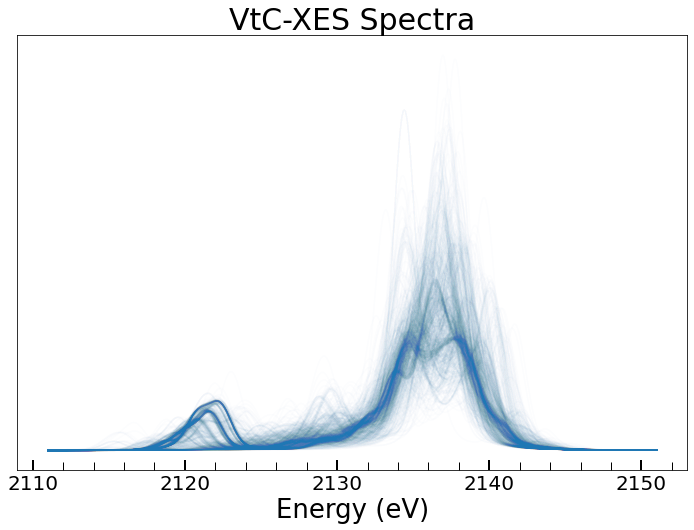

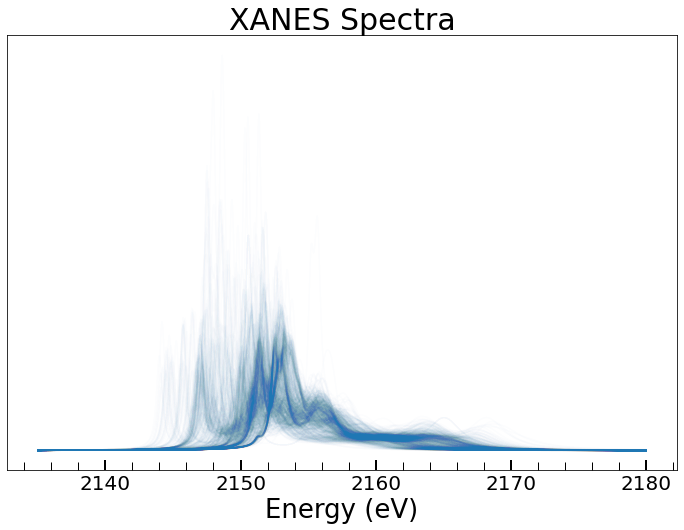

In [12]:
xesplt = plot_spaghetti(plt.subplots(figsize=(12,8)), X_data_classed, mode='XES', coloralpha=0.01)
xanesplt = plot_spaghetti(plt.subplots(figsize=(12,8)), X_data_classed, mode='XANES', coloralpha=0.01)

## Rainbow Spaghetti Plot: Color and Stack by Compound Class

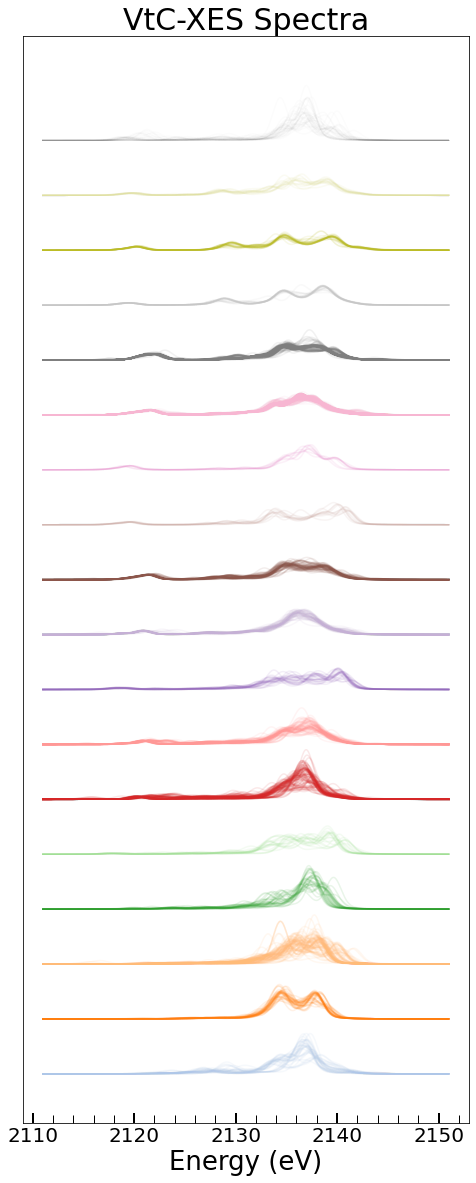

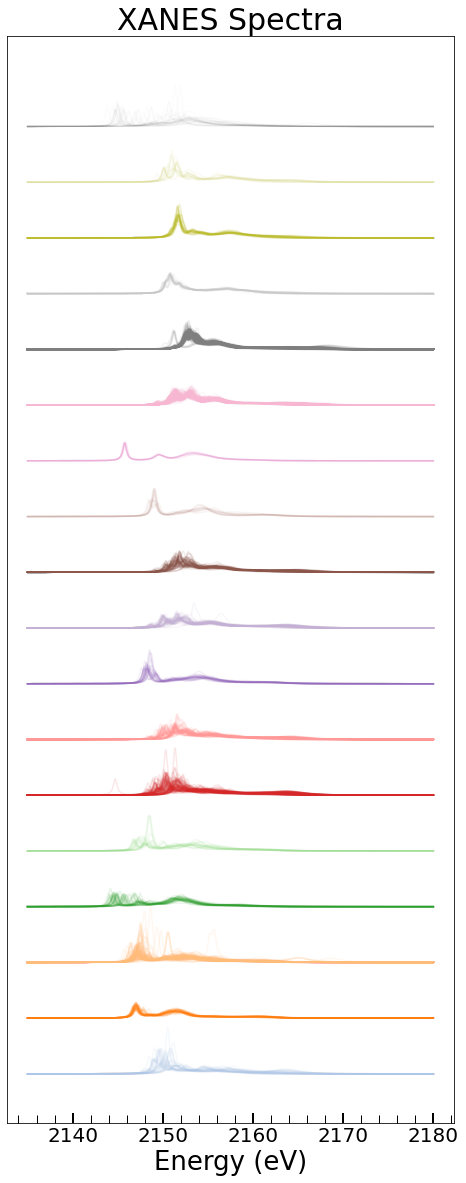

In [13]:
xesspagplt = plot_spaghetti(plt.subplots(figsize=(8,20)), X_data, colorcodemap=classcodemap, binmap=classcodemap,
               mode='XES', coloralpha=0.1, hiddencids=NoneCIDs)
xanesspagplt = plot_spaghetti(plt.subplots(figsize=(8,20)), X_data, colorcodemap=classcodemap, binmap=classcodemap,
               mode='XANES', coloralpha=0.1, hiddencids=NoneCIDs)

add_line_label(xesspagplt, X_data)
add_line_label(xanesspagplt, X_data)

# ML Reduced Space: PCA and t-SNE

In [14]:
warnings.filterwarnings("ignore")

XES = np.array([c['XES_Normalized'] for c in X_data_classed])
XANES = np.array([c['XANES_Normalized'] for c in X_data_classed])

# pca
pca1 = PCA(n_components=2)
XES_PCA = pca1.fit_transform(XES)

# pca
pca2 = PCA(n_components=2)
XANES_PCA = pca2.fit_transform(XANES)

# tsne
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
XES_TSNE = tsne.fit_transform(XES)

# tsne
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
XANES_TSNE = tsne.fit_transform(XANES)

In [15]:
# Make CID->point maps
XANES_pcamap = {compound['CID']:point for compound,point in zip(X_data_classed, XANES_PCA)}
XES_pcamap = {compound['CID']:point for compound,point in zip(X_data_classed, XES_PCA)}
XANES_tsnemap = {compound['CID']:point for compound,point in zip(X_data_classed, XANES_TSNE)}
XES_tsnemap = {compound['CID']:point for compound,point in zip(X_data_classed, XES_TSNE)}

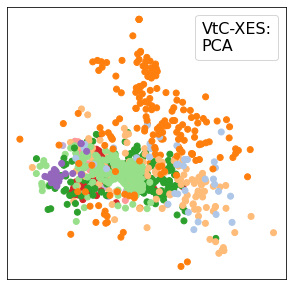

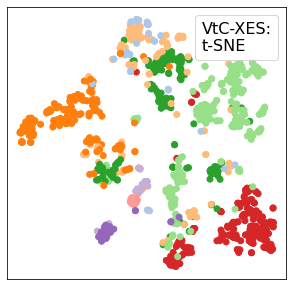

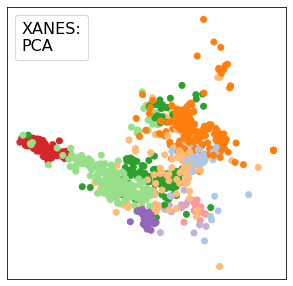

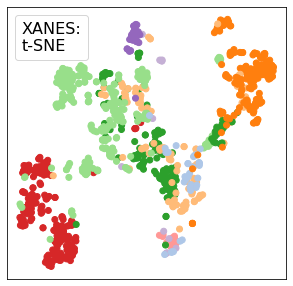

In [16]:
xespcaplt = plot_dim_red(plt.subplots(figsize=(5,5)), X_data_classed, XES_pcamap, colorcodemap=typecodemap, \
             mode='XES', method='PCA', hiddencids=NoneCIDs)
xestsneplt = plot_dim_red(plt.subplots(figsize=(5,5)), X_data_classed, XES_tsnemap, colorcodemap=typecodemap, \
             mode='XES', method='t-SNE', hiddencids=NoneCIDs)
xanespcaplt = plot_dim_red(plt.subplots(figsize=(5,5)), X_data_classed, XANES_pcamap, colorcodemap=typecodemap, \
             mode='XANES', method='PCA', hiddencids=NoneCIDs)
xanestsneplt = plot_dim_red(plt.subplots(figsize=(5,5)), X_data_classed, XANES_tsnemap, colorcodemap=typecodemap, \
             mode='XANES', method='t-SNE', hiddencids=NoneCIDs)

add_point_label(xespcaplt, X_data)
add_point_label(xestsneplt, X_data)
add_point_label(xanespcaplt, X_data)
add_point_label(xanestsneplt, X_data)

# PCA + t-SNE

In [31]:
# pca
pca_all_xes = PCA()
XES_PCA = pca_all_xes.fit_transform(XES)
pca_all_xanes = PCA()
XANES_PCA = pca_all_xanes.fit_transform(XANES)

In [43]:
print(np.sum(pca_all_xes.explained_variance_ratio_[:7]))
print(np.sum(pca_all_xanes.explained_variance_ratio_[:13]))

0.9220581747093705
0.902361820424501


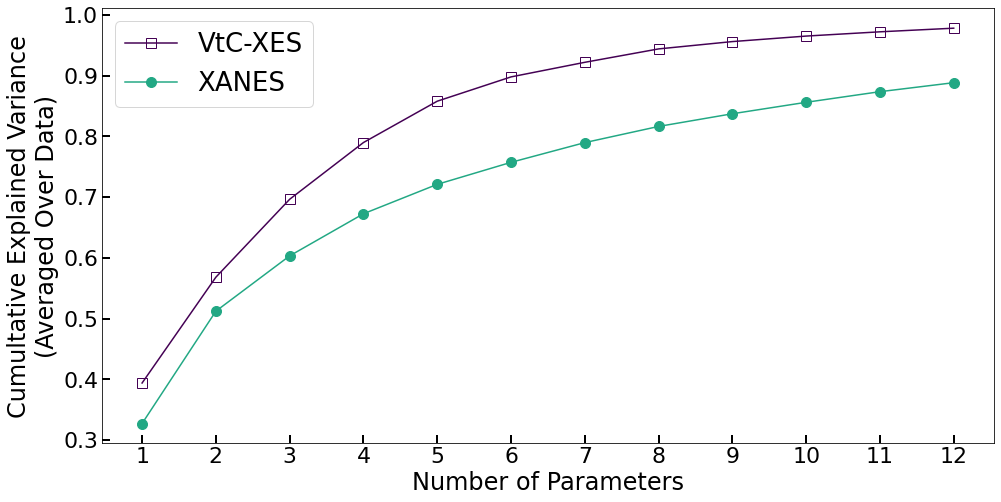

In [44]:
def make_stacked_scree(xes, xanes, n=None):
    
    if n is None:
        n = len(xanes)
    else:
        xes = xes[:n]
        xanes = xanes[:n]

    fig, ax = plt.subplots(figsize=(16, 8))

    x = np.arange(n)+1
    
    cdf_xes = [np.sum(xes[:i+1]) for i in range(n)]
    cdf_xanes = [np.sum(xanes[:i+1]) for i in range(n)]

    ax.plot(x, cdf_xes, 's-', markersize=10, fillstyle='none', color=plt.cm.viridis(0), label='VtC-XES')
    ax.plot(x, cdf_xanes, 'o-', markersize=10, color=plt.cm.viridis(0.6), label='XANES')
    

    plt.xticks(x, fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlabel('Number of Parameters', fontsize=24)
    plt.ylabel(f'Cumultative Explained Variance\n(Averaged Over Data)', fontsize=24)
#     plt.xlim(0,n+1)
    ax.tick_params(direction='in', width=2, length=8)
    
    plt.legend(fontsize=26)

    plt.show()
    
make_stacked_scree(pca_all_xes.explained_variance_ratio_, pca_all_xanes.explained_variance_ratio_, n=12)

# PCA first then t-SNE

In [45]:
# pca
pca1 = PCA(n_components=5)
XES_PCA = pca1.fit_transform(XES)

# pca
pca2 = PCA(n_components=13)
XANES_PCA = pca2.fit_transform(XANES)

# tsne
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
XES_TSNE = tsne.fit_transform(XES_PCA)

# tsne
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
XANES_TSNE = tsne.fit_transform(XANES_PCA)

# Make CID->point maps
XANES_tsnemap = {compound['CID']:point for compound,point in zip(X_data_classed, XANES_TSNE)}
XES_tsnemap = {compound['CID']:point for compound,point in zip(X_data_classed, XES_TSNE)}

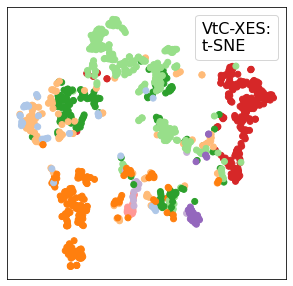

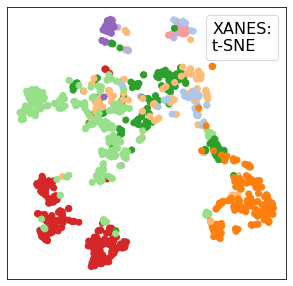

In [46]:
xestsneplt = plot_dim_red(plt.subplots(figsize=(5,5)), X_data_classed, XES_tsnemap, colorcodemap=typecodemap, \
             mode='XES', method='t-SNE', hiddencids=NoneCIDs)
xanestsneplt = plot_dim_red(plt.subplots(figsize=(5,5)), X_data_classed, XANES_tsnemap, colorcodemap=typecodemap, \
             mode='XANES', method='t-SNE', hiddencids=NoneCIDs)

# Analysis Block

In [22]:
%matplotlib inline

In [23]:
classnames

['phosphorane',
 'phosphane',
 'trialkyl_phosphine',
 'phosphaalkene',
 'phosphinite',
 'phosphine_oxide',
 'phosphinate',
 'phosphonite',
 'phosphenic_acid',
 'phosphonate',
 'phosphite_ester',
 'hypophosphite',
 'phosphonic_acid',
 'phosphate',
 'dithiophosphate',
 'phosphorothioate',
 'methylphosphonothioate']

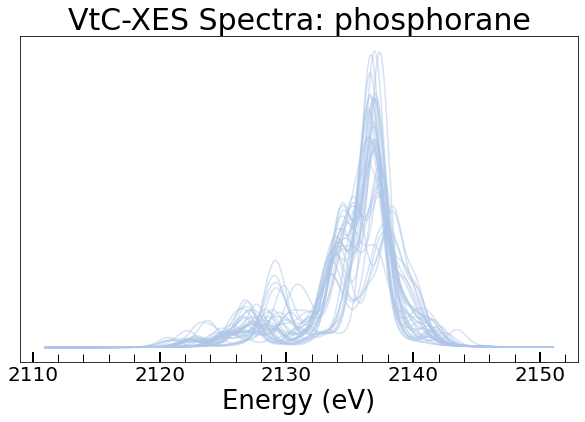

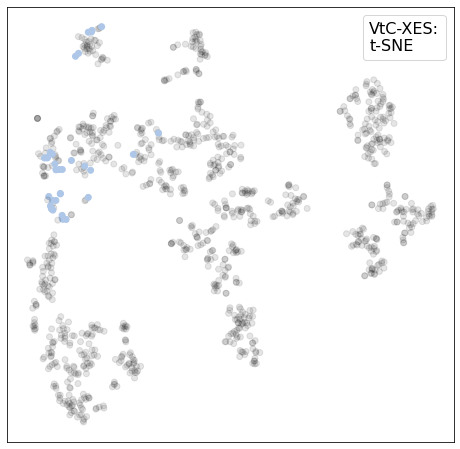

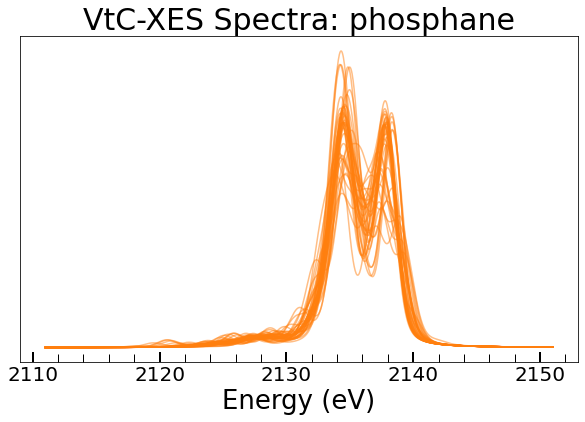

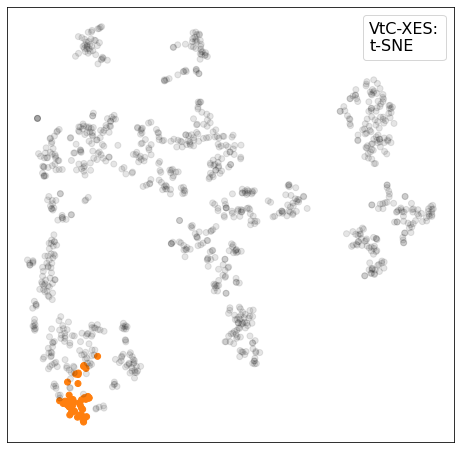

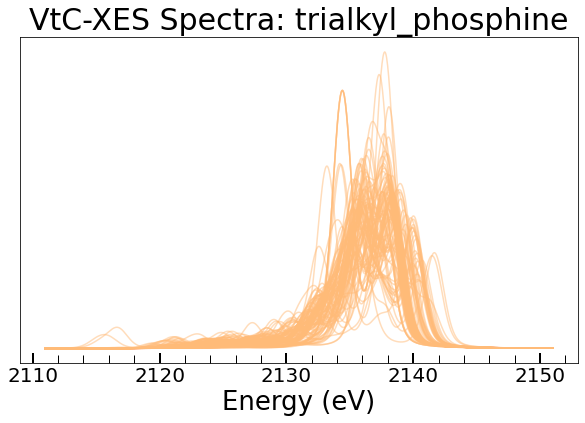

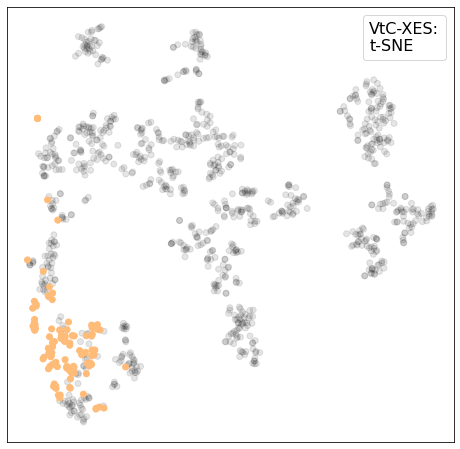

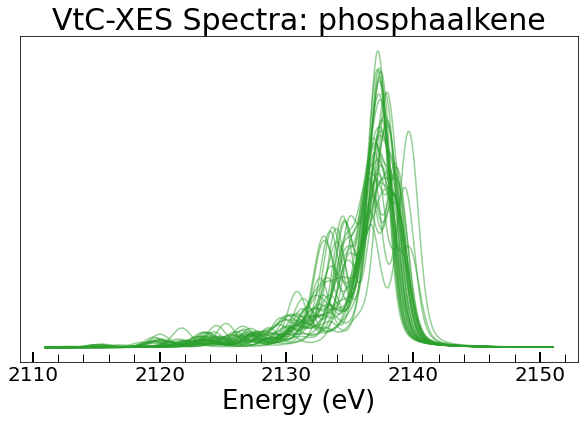

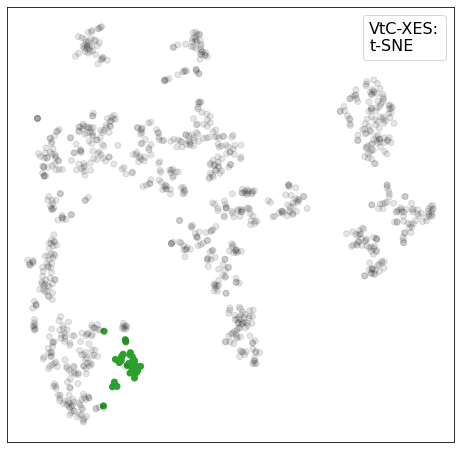

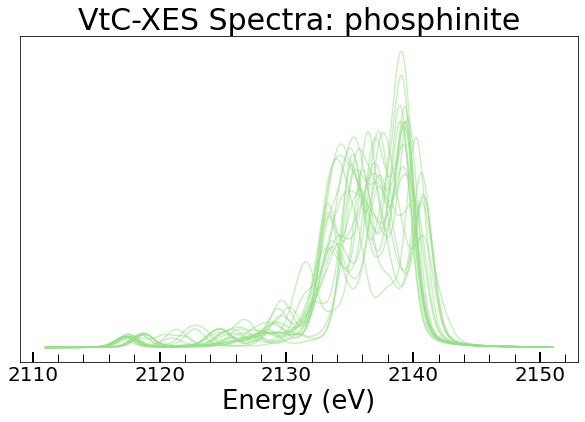

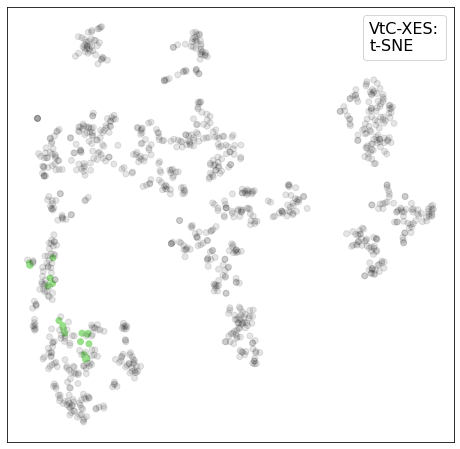

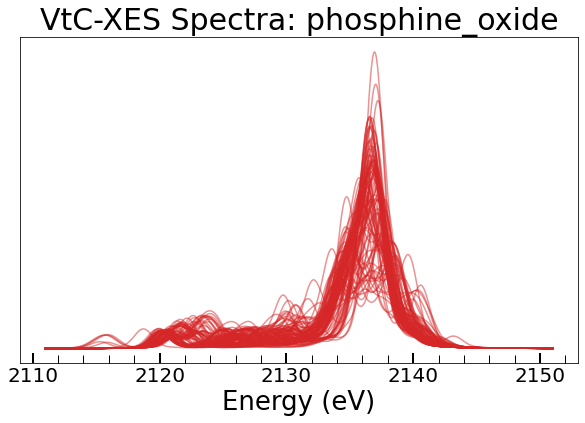

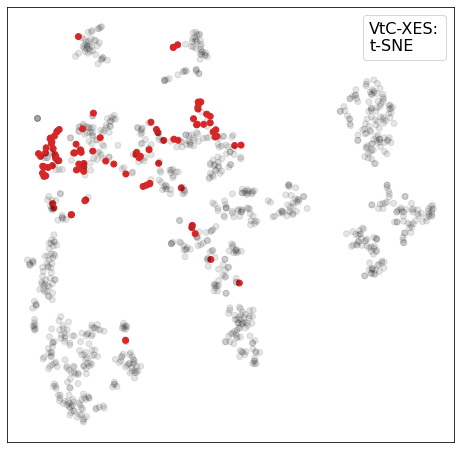

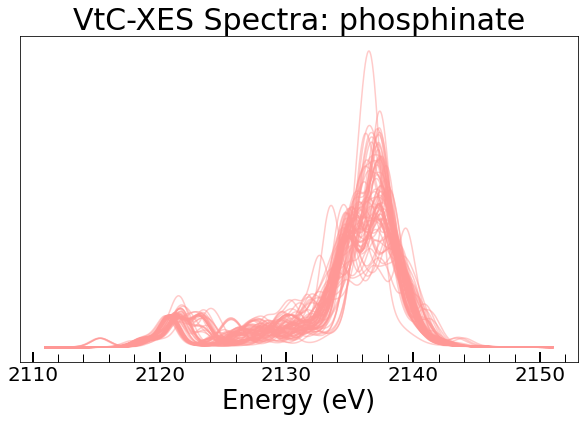

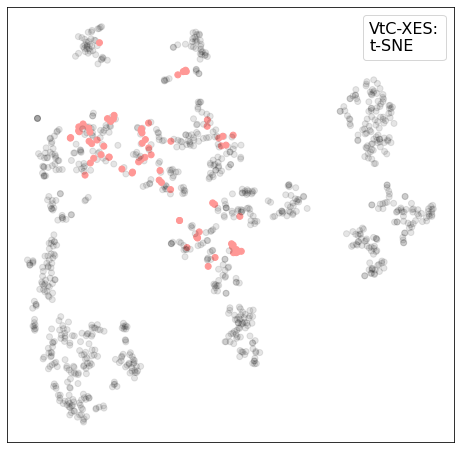

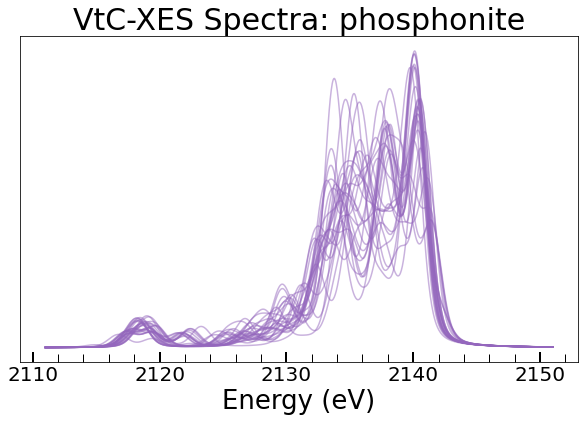

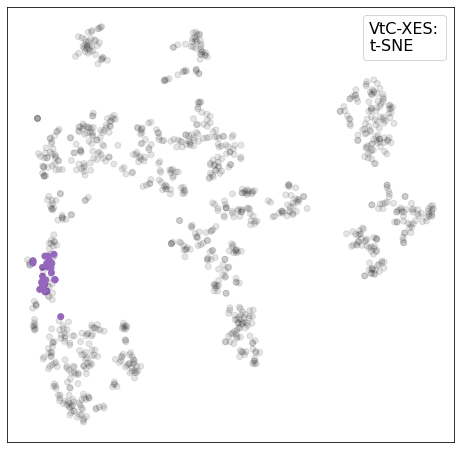

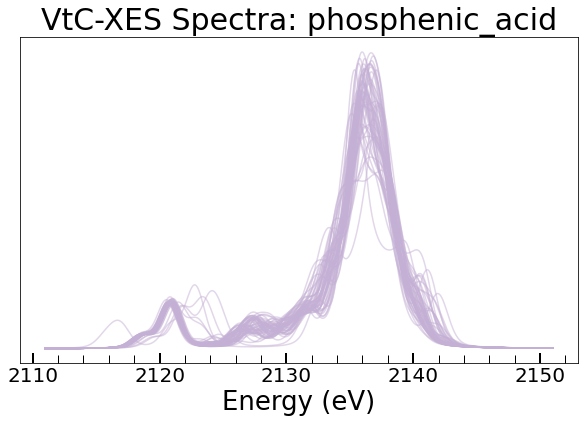

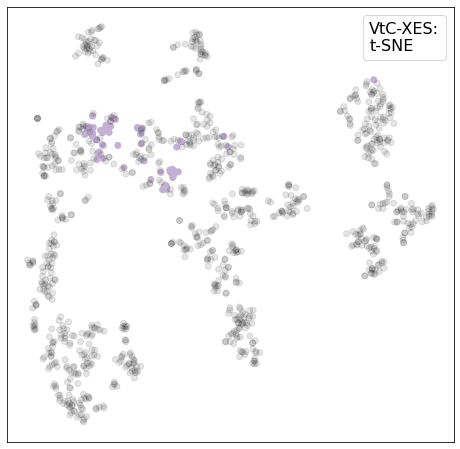

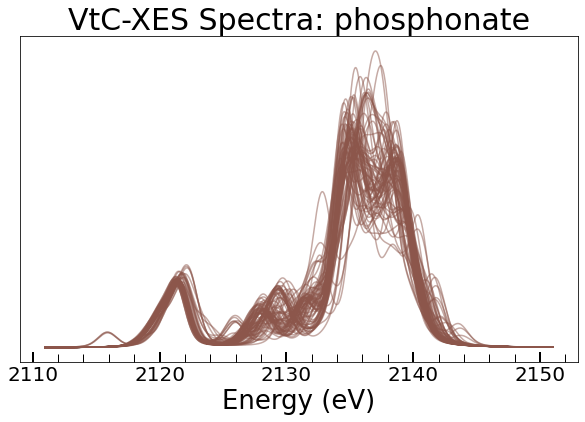

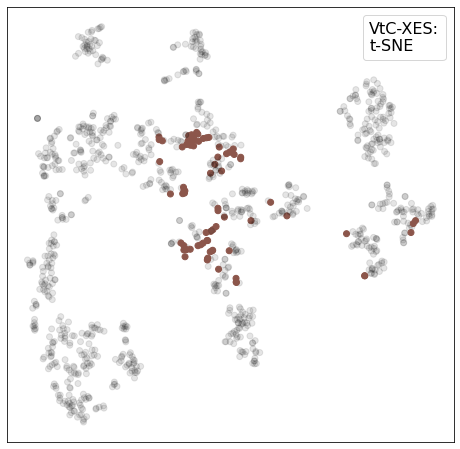

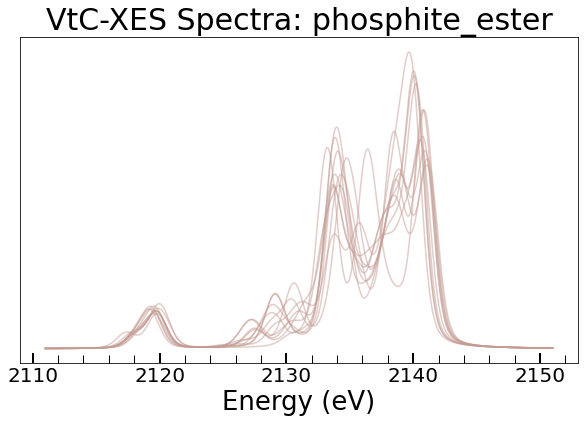

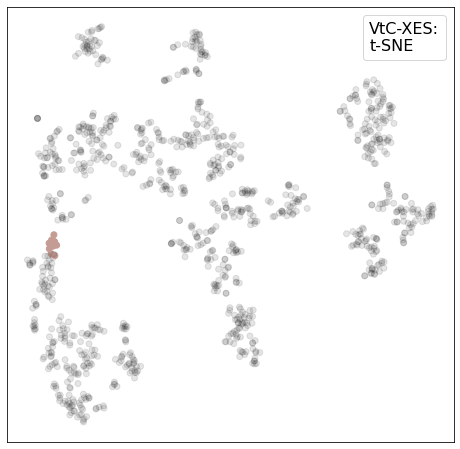

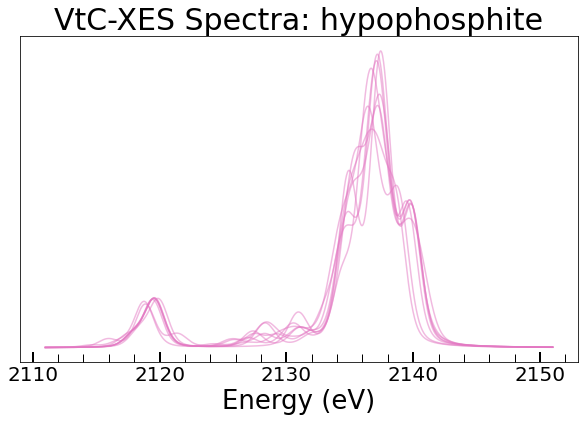

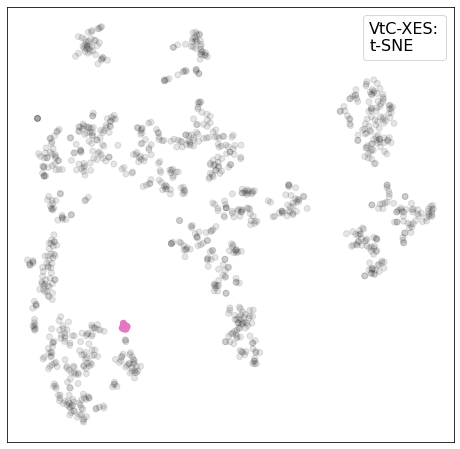

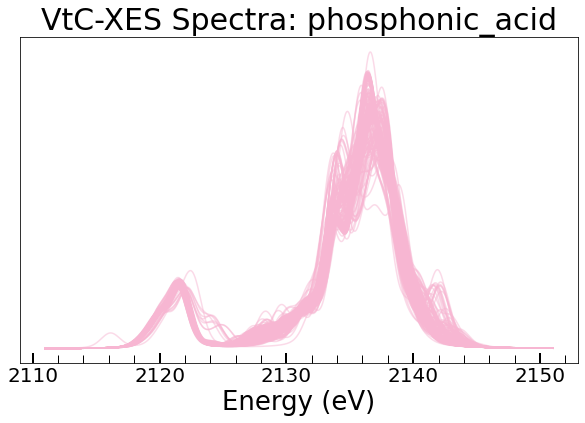

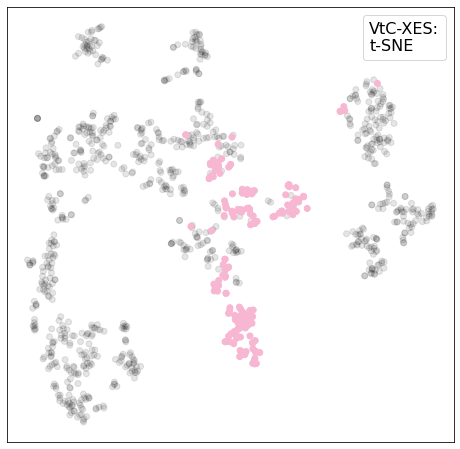

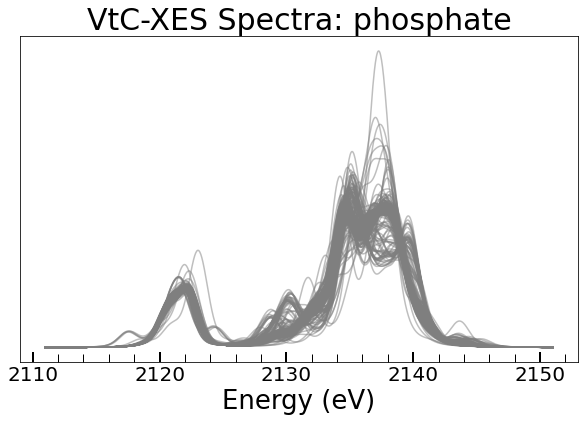

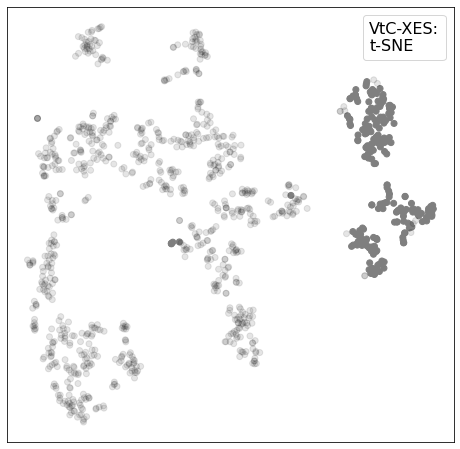

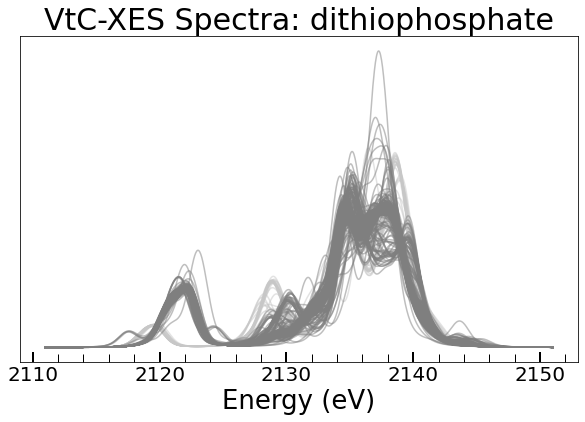

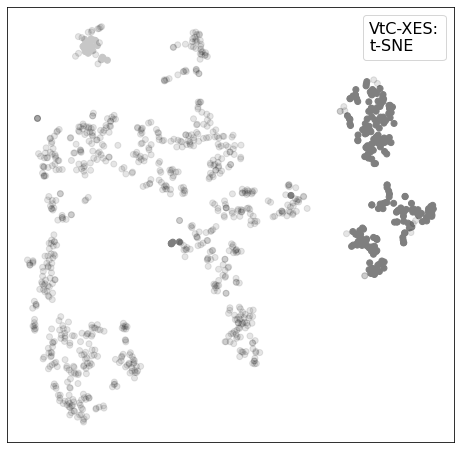

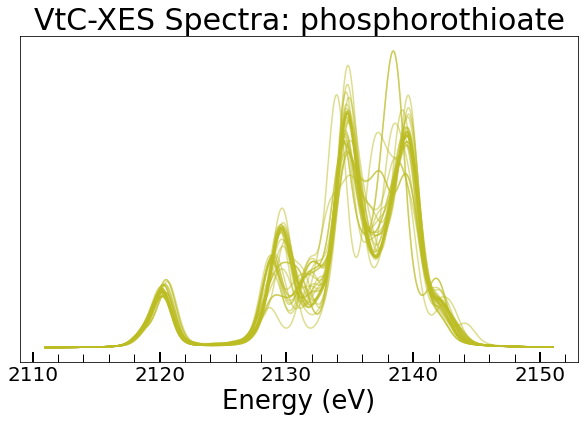

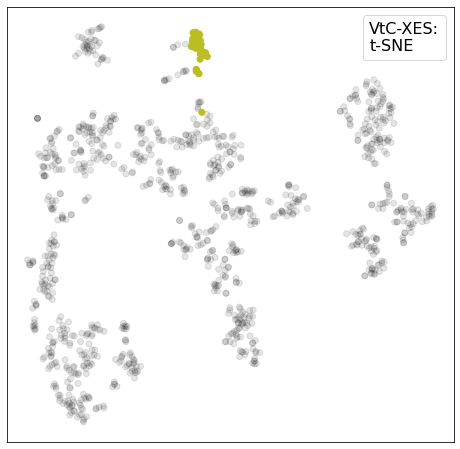

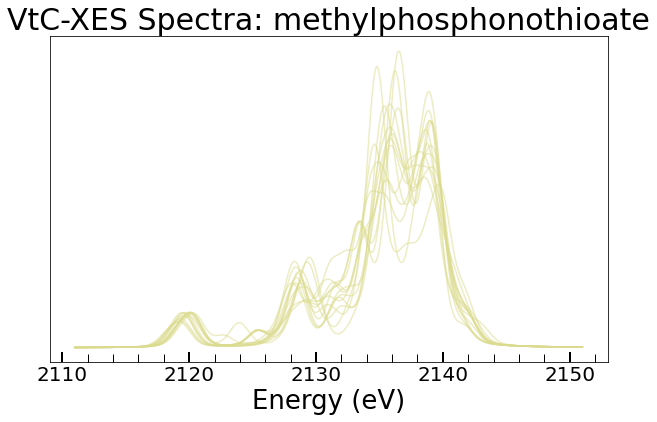

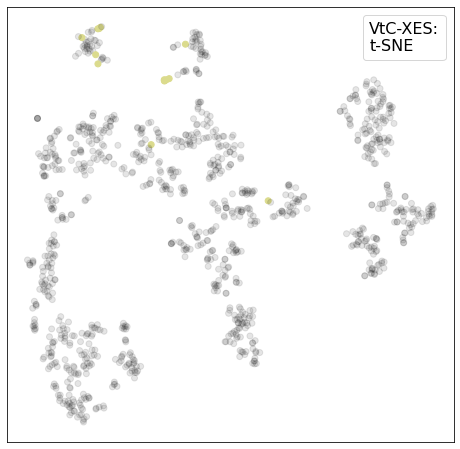

In [24]:
mode='XES'
select = classnames
for classname in select:
    kwargs = {'Class': classname}
    xanesplt = plot_spaghetti(plt.subplots(figsize=(10,6)), X_data_classed, mode=mode,
                              colorcodemap=classcodemap, hiddenalpha=0,
                              coloralpha=0.5, **kwargs)
    xanestsneplt = plot_dim_red(plt.subplots(figsize=(8,8)), X_data_classed, XANES_tsnemap,
                                colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.1,
                                mode=mode, method='t-SNE', **kwargs)
    # add interactive functions
    # spaghetti plot
    add_line_label(xanesplt, X_data_classed)
    add_line_pubchem_link(xanesplt, X_data_classed)
    #tsne
    add_point_pubchem_link(xanestsneplt, X_data_classed)
    add_point_label(xanestsneplt, X_data_classed)  

# Heirarchical Clustering

In [25]:
Z = linkage(XANES, method='ward')
# Z = linkage(XES, method='weighted', metric='cosine')

In [26]:
cmap = plt.cm.viridis(np.linspace(0, 1, 4))
hierarchy.set_link_color_palette([to_hex(rgb) for rgb in cmap])

In [27]:
p = 14
R = dendrogram(Z, truncate_mode='lastp', p=p, no_plot=True)
labels = np.arange(1,p + 1)
temp = {R["leaves"][ii]:(labels[ii], R["ivl"][ii]) for ii in range(len(R["leaves"]))}
def llf(xx):
    return "{}: {}".format(*temp[xx])

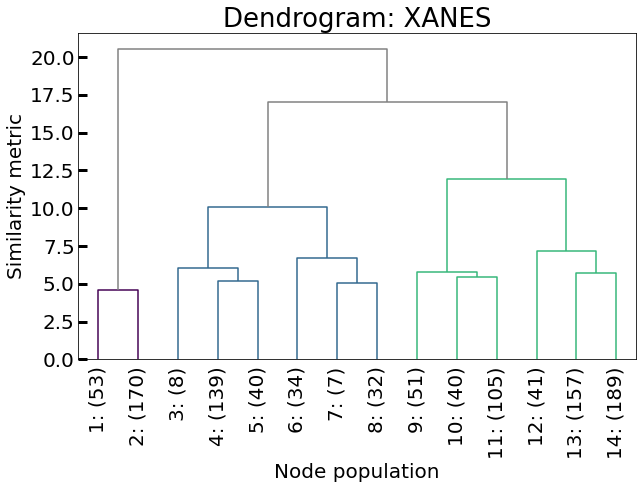

In [28]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Dendrogram: XANES', fontsize=26)

# plot the top levels of the dendrogram
result = dendrogram(Z, truncate_mode='lastp', p=p,
                    above_threshold_color='gray',
                    leaf_label_func=llf,
                    leaf_rotation=90)

ax.tick_params(axis='y',direction='in', width=3, length=9)
plt.ylabel("Similarity metric", fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Node population", fontsize=20)
plt.xticks(fontsize=20)

plt.show()

In [29]:
cluster_labels = fcluster(Z, p, criterion='maxclust')

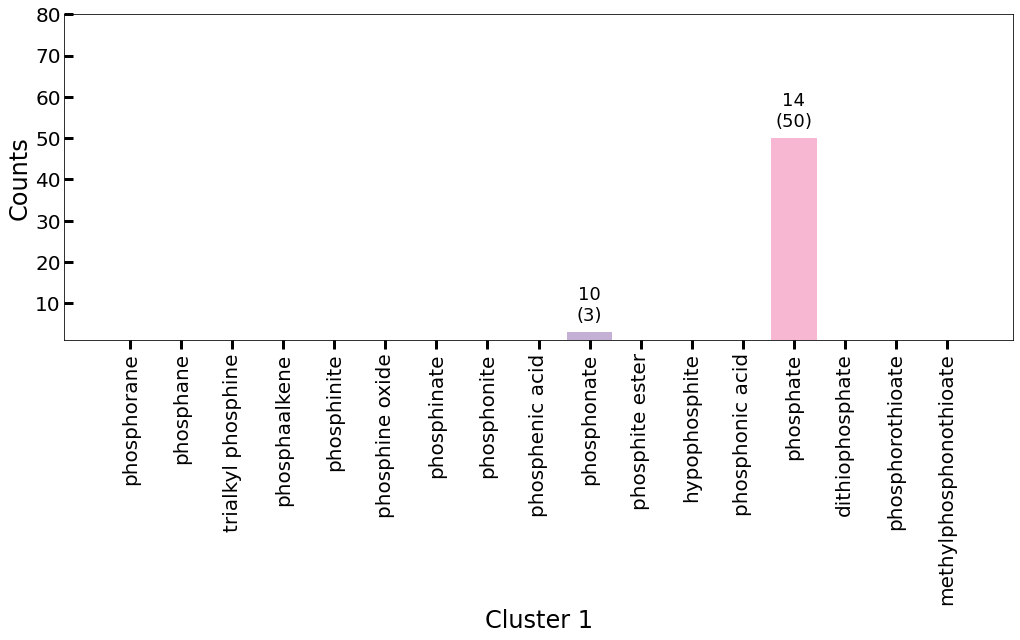

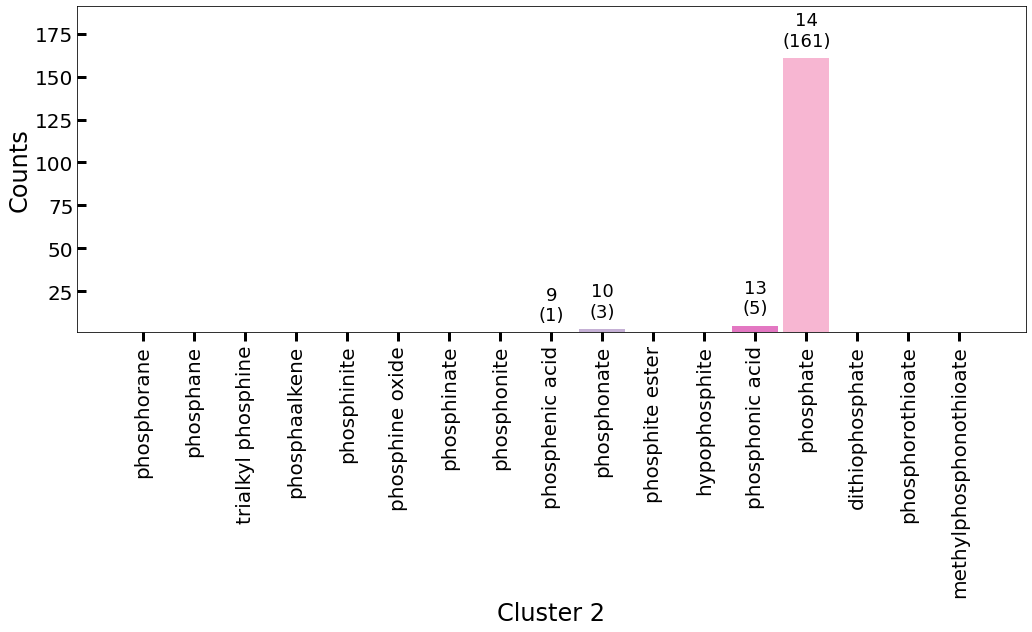

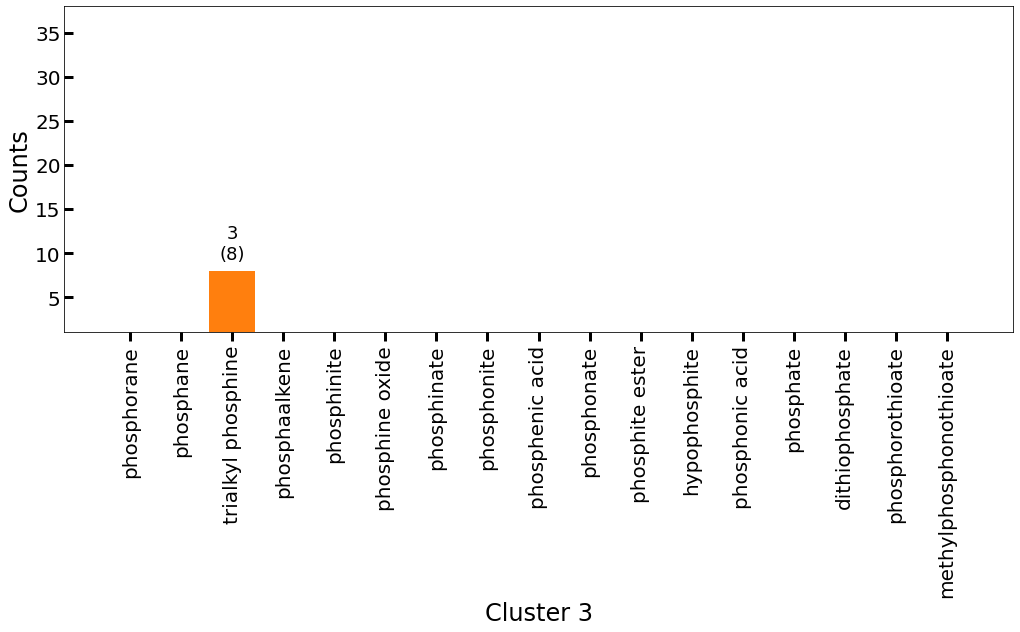

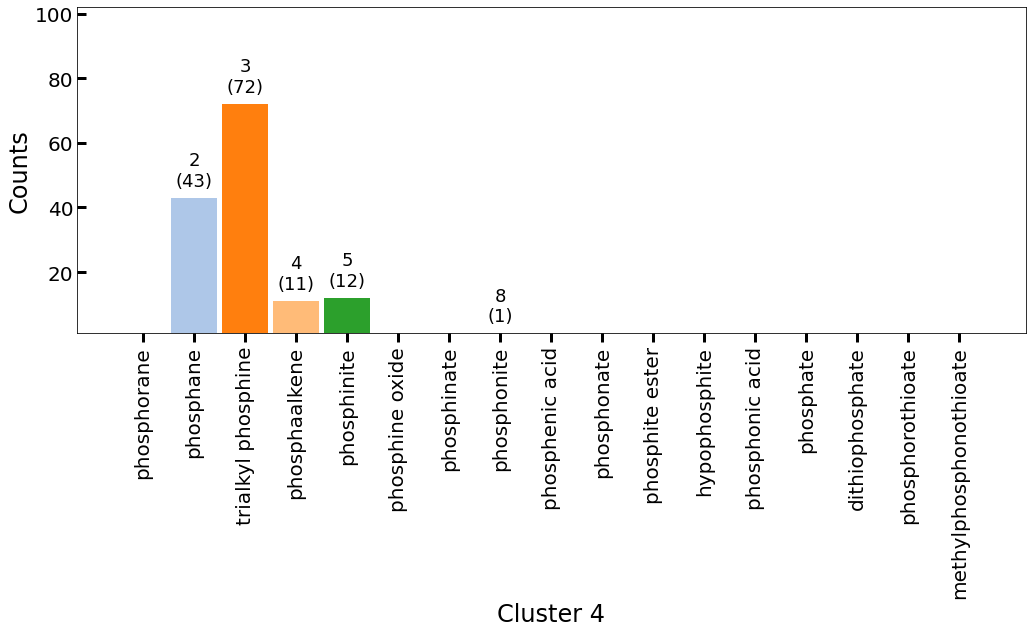

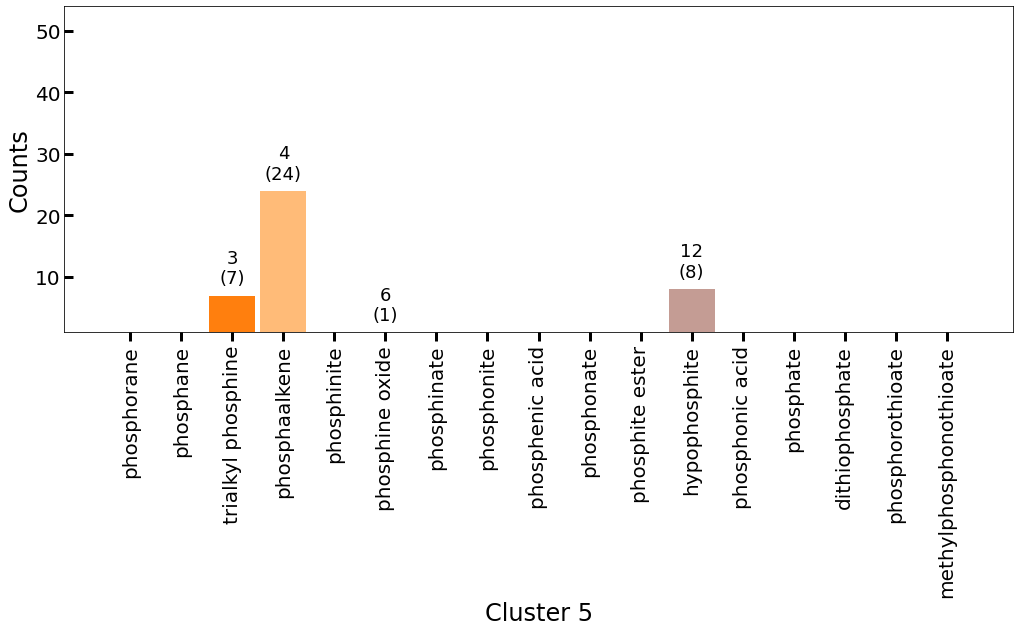

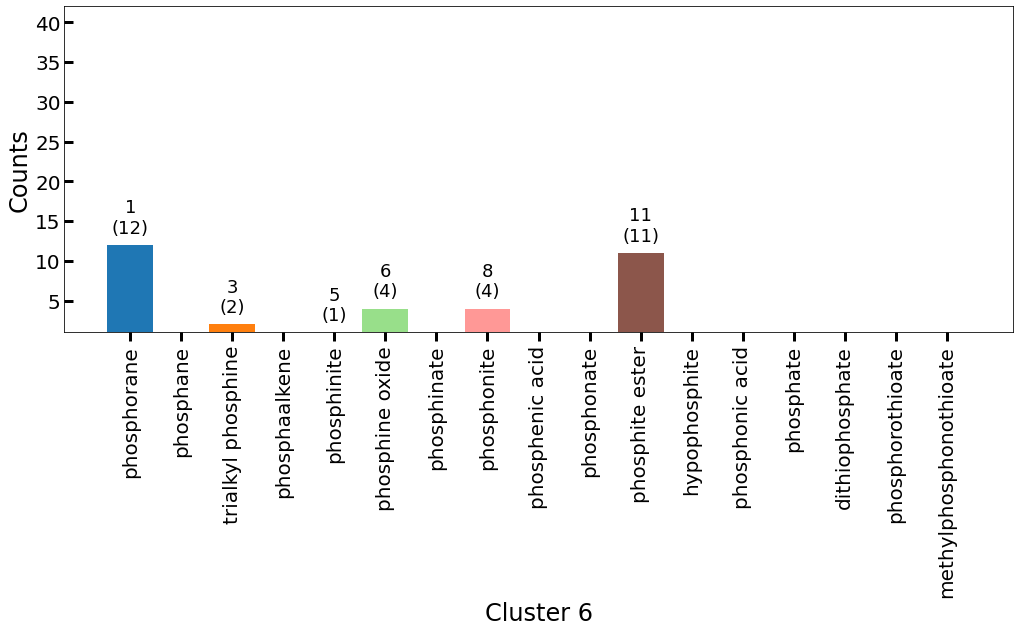

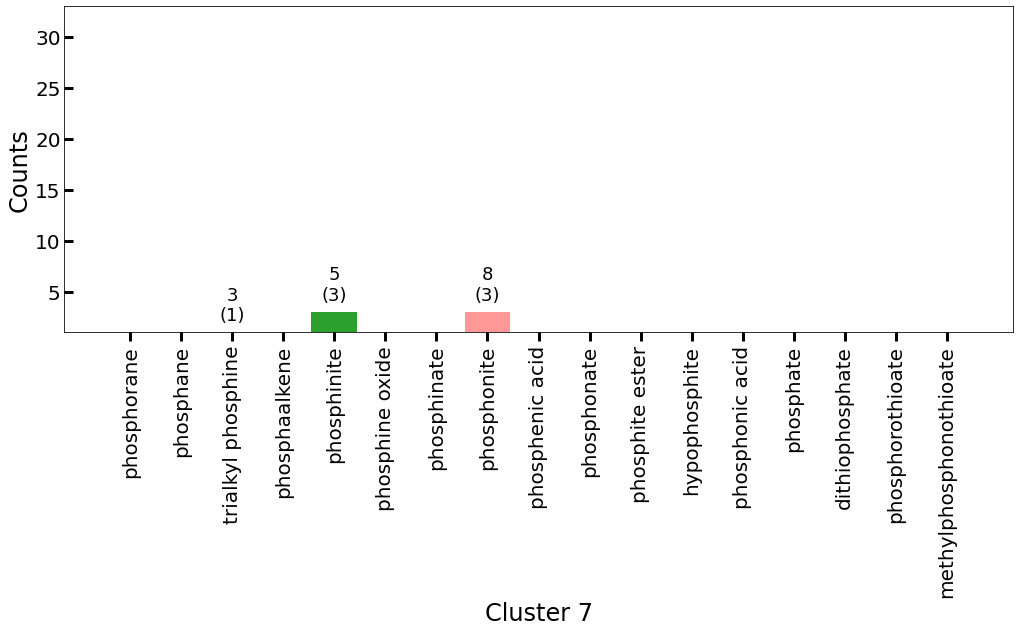

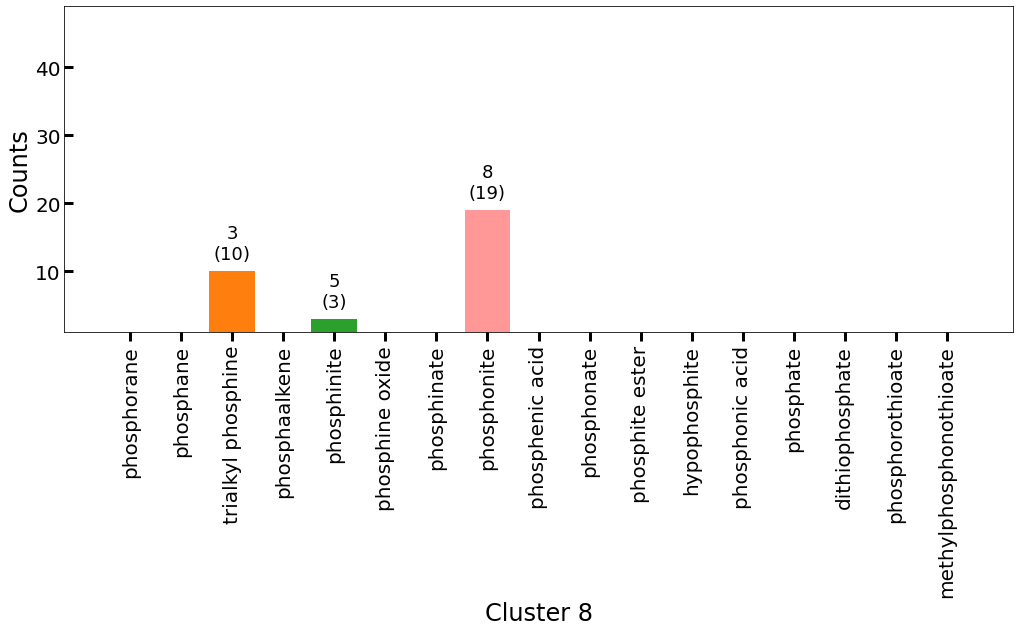

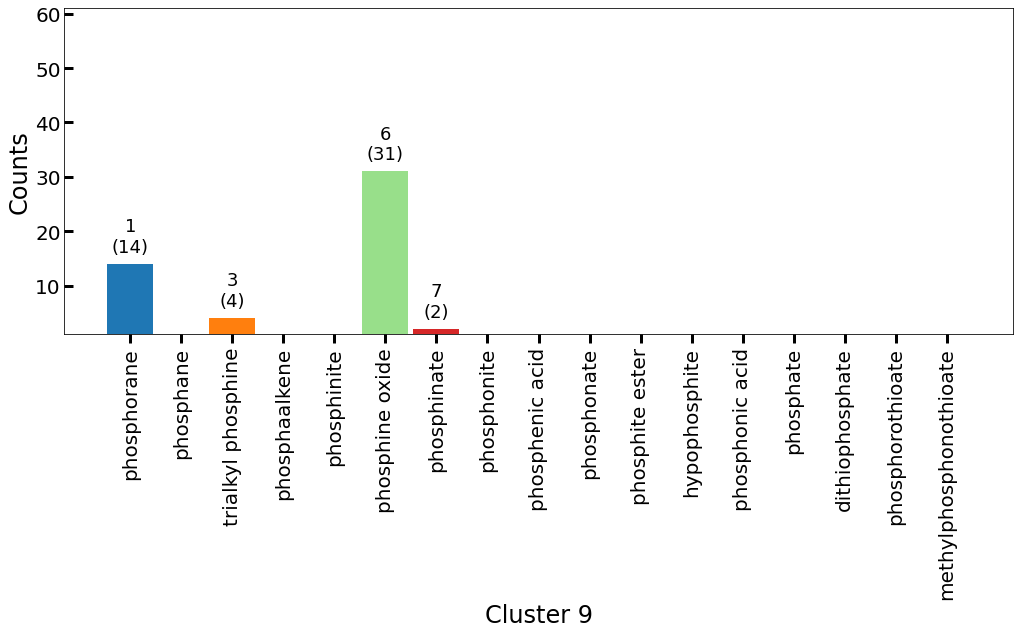

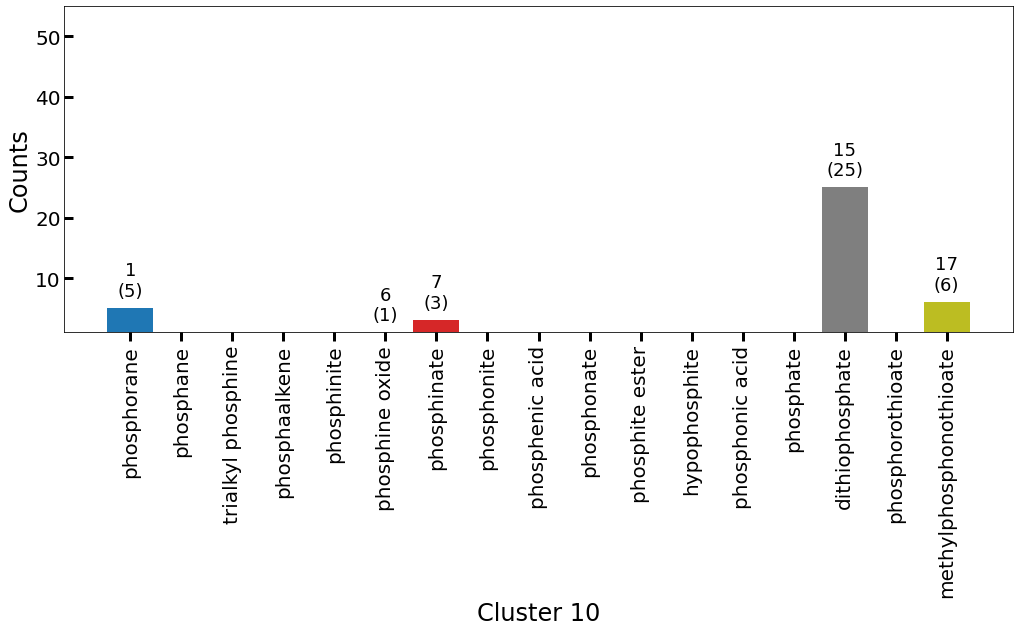

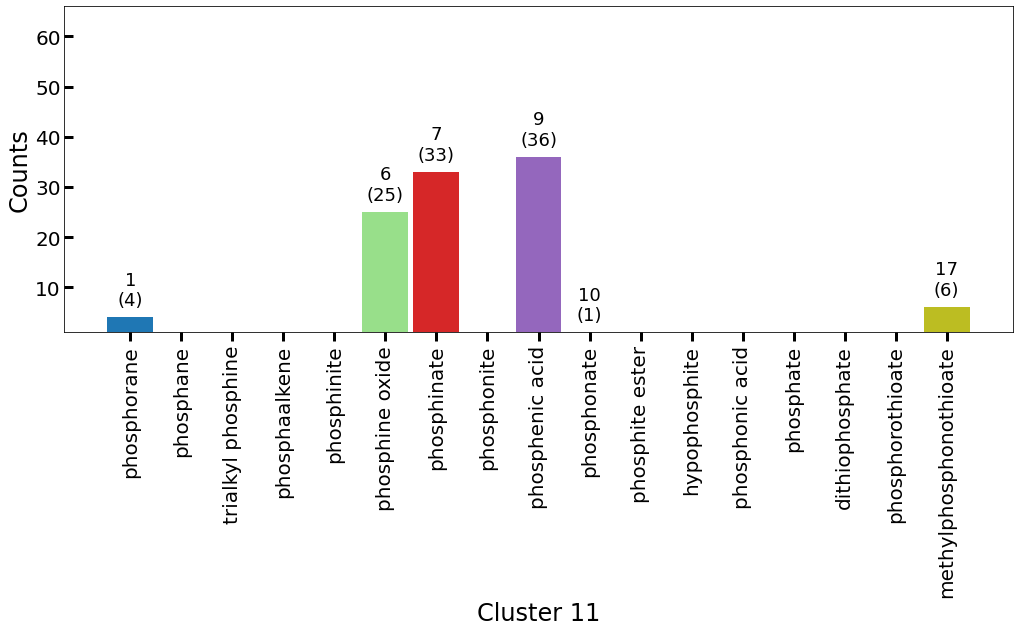

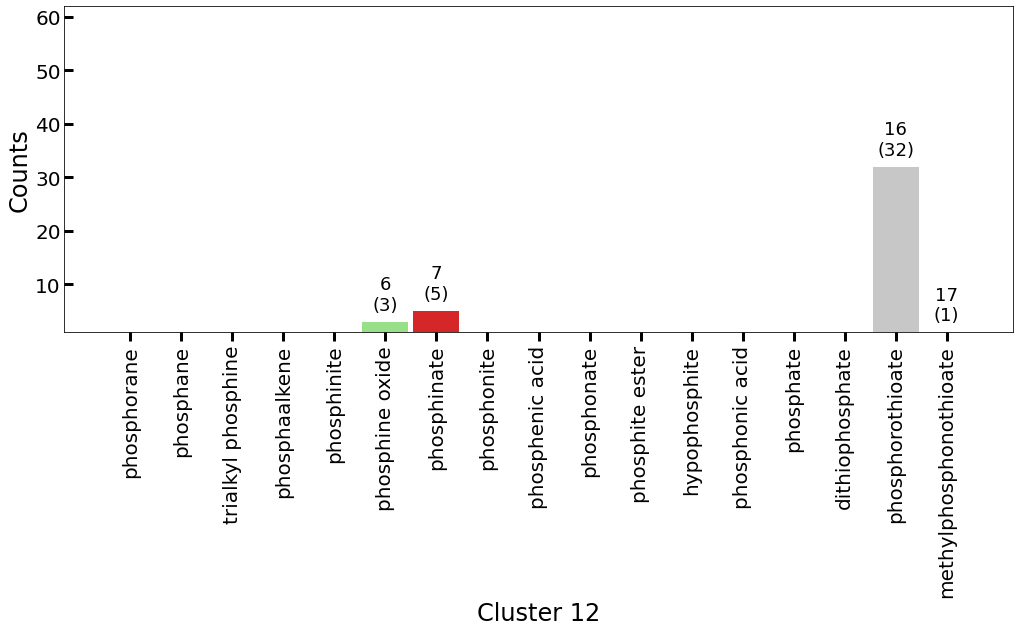

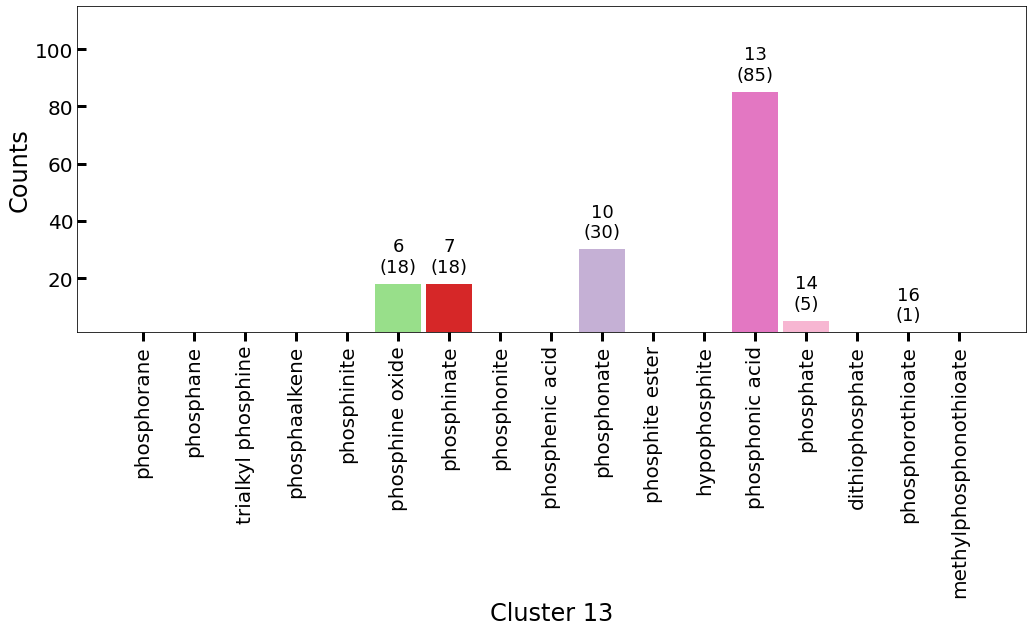

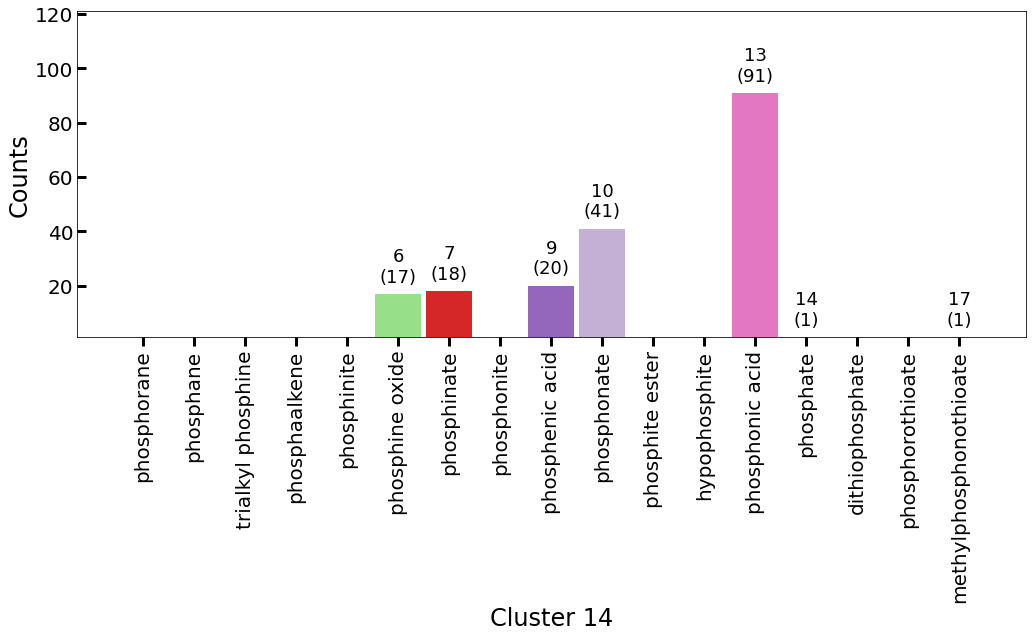

In [30]:
for i in range(1,p + 1):
    bool_arr = cluster_labels == i
    compoundclasses = [c['Class'] for c in X_data_classed]
    categorizer = list(compress(compoundclasses, bool_arr))

    classnames = list(CLASSCODES.keys())[:-1]
    bins = [np.sum(np.array(categorizer)==classname) for classname in classnames]
    
    hist(bins, [c.replace('_', ' ') for c in classnames], xlabel=f'Cluster {i}', verbose=True)